## Random Forest

![Random Forest](https://aiml.com/wp-content/uploads/2023/03/random-forest-classifier-3-1024x586.png)

Random Forest is a popular ensemble learning technique used in machine learning for classification and regression tasks. It's a type of decision tree ensemble method that combines multiple decision trees to make more accurate predictions than any individual tree.Random forest is a supervised machine learning algorithm that combines the results of multiple decision trees to reach a single result. It's an extension of the bagging method, which is an ensemble learning method that aggregates the predictions of a set of classifiers to identify the most popular result

Here's how it works:

1. **Decision Trees**: At the core of Random Forest are decision trees. A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a continuous value. Decision trees are built by recursively splitting the data based on features to minimize impurity or maximize information gain.

2. **Bootstrapping**: Random Forest uses a technique called bootstrapping to create multiple random subsets of the training dataset. Each subset, known as a bootstrap sample, is of the same size as the original dataset but is sampled with replacement. This means some instances may be repeated in each bootstrap sample while others may not be included. Row Sampling, column sampling or Both

3. **Random Feature Selection**: When constructing each decision tree in the Random Forest, a random subset of features is selected at each split instead of considering all features. This introduces randomness and helps in decorrelating the trees, making the model more robust and less prone to overfitting.

4. **Voting (Classification) or Averaging (Regression)**: Once all the trees are constructed using the bootstrapped samples and random feature subsets, predictions are made by either voting (in classification) or averaging (in regression) the predictions of individual trees. For classification tasks, the class with the most votes among all the trees is chosen as the final prediction. For regression tasks, the average of all predictions is taken.

The key advantages of Random Forest include its ability to handle high-dimensional data, avoid overfitting, and provide estimates of feature importance. It's also robust to outliers and missing values. However, Random Forest can be computationally expensive and may not perform well on very noisy datasets. Overall, it's a versatile and powerful machine learning algorithm that is widely used in various applications.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.297848,0.255380,1.226863,-1.207361,-2.037196,0
1,3.682513,0.950300,2.855772,-1.327560,-2.314311,1
2,-2.571076,-0.500270,2.331311,-1.856677,-3.292944,0
3,0.638410,-2.293905,0.160154,-0.985136,2.437234,1
4,1.111207,-0.895884,1.669223,-1.424385,1.536509,1


In [4]:
# function for row sampling
def sample_rows(df, percent):
    # Calculate the number of rows to sample based on the percentage
    sample_size = int(percent * df.shape[0])
    
    # Randomly sample rows from the DataFrame
    sampled_df = df.sample(sample_size, replace=True)
    
    # Return the sampled DataFrame
    return sampled_df

In [5]:
# function for feature sampling
import random

def sample_features(df, percent):
    # Randomly select a subset of features (excluding the target column)
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    
    # Create a new DataFrame containing only the selected features and the target column
    new_df = df[cols]
    new_df['target'] = df['target']
    
    # Return the new DataFrame
    return new_df

In [6]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    # Sample rows from the DataFrame
    new_df = sample_rows(df, row_percent)
    
    # Sample features from the resulting DataFrame
    return sample_features(new_df, col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_15816\1854259700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_15816\1854259700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_15816\1854259700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [8]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col2', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [9]:
df3.shape

(50, 3)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [12]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.9375, 'X[1] <= -0.822\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.4444444444444444, 0.8125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6666666666666666, 0.8125, 'X[0] <= -0.972\ngini = 0.368\nsamples = 37\nvalue = [28, 9]'),
 Text(0.5555555555555556, 0.6875, 'X[0] <= -1.203\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.4444444444444444, 0.5625, 'X[1] <= -0.525\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5555555555555556, 0.4375, 'X[1] <= 0.888\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.3333333333333333, 0.3125, 'X[1] <= -0.248\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2222222222222222, 0.1875, 'X[0] <= -1.992\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.

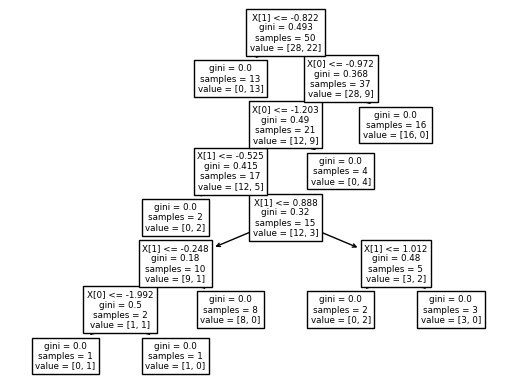

In [13]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.875, 'X[1] <= -0.099\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.2222222222222222, 0.625, 'X[0] <= -1.927\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.6666666666666666, 0.625, 'X[0] <= 1.351\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7777777777777778, 0.375, 'X[1] <= 2.011\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

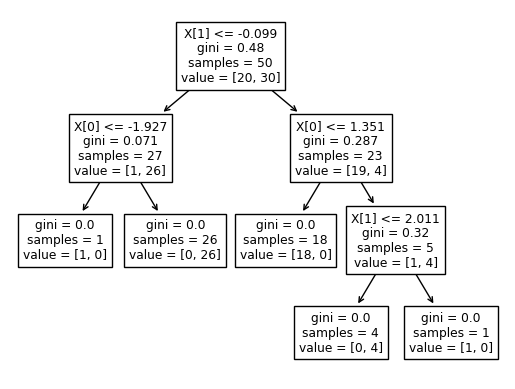

In [14]:
plot_tree(clf2)

[Text(0.39285714285714285, 0.9, 'X[1] <= -0.111\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.14285714285714285, 0.7, 'X[1] <= -0.747\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.21428571428571427, 0.5, 'X[1] <= -0.556\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6428571428571429, 0.7, 'X[0] <= 2.782\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.5, 0.5, 'X[0] <= 1.685\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5714285714285714, 0.3, 'X[0] <= 1.752\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6428571428571429, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.

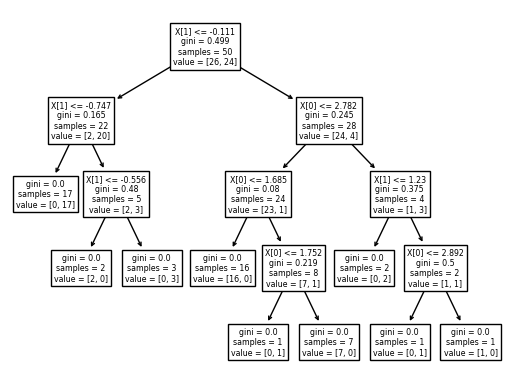

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([0.301415, 1.790821]).reshape(1,2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
clf2.predict(np.array([0.301415, 1.790821]).reshape(1,2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
clf3.predict(np.array([0.301415, 1.790821]).reshape(1,2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])